In [1]:
import numpy as np
import gymnasium as gym

In [2]:
# We have continuous action, observation space

# Action space: Box(-1.0, 1.0, (1,), float32)
# Action space have 1 interval: 
# 1. [-1.0, 1.0] - force applied to the car

# Observation space: Box([-1.2 -0.07], [0.6 0.07], (2,), float32)
# Observation space have 2 invervals:
# 1. [-1.2, 0.6] - position of the car along the x-axis
# 2. [-0.07, 0.07] - velocity of the car 


In [3]:
# need to discretize the action and observation (position and velocity) spaces

action_space_steps = 5
observation_space_steps = 20

action_space = np.linspace(-1.0, 1.0, action_space_steps)

# observation space is created by 2 intervals 
position_space = np.linspace(-1.2, 0.6, observation_space_steps)
velocity_space = np.linspace(-0.07, 0.07, observation_space_steps)


In [4]:
def get_state(observation):
    """
    Discretize the continuous observation into discrete state
    State is a tuple of 2 elements: position and velocity
    """
    
    position, velocity = observation
    
    position_bin = np.digitize(position, position_space)
    velocity_bin = np.digitize(velocity, velocity_space)
    
    return (position_bin, velocity_bin)

In [5]:
def max_action_index(Q, state, action_space):
    """
    Return the index of the action_space with the highest Q-value
    """
    state_tuple = ( int(state[0]), int(state[1]) )
    
    
    values = np.array([Q[state_tuple, a] for a in range(len(action_space))])
    action_index = np.argmax(values)
    
    return action_index

In [6]:
env = gym.make("MountainCarContinuous-v0", render_mode=None)

In [7]:
# Example of discretizin
observation, info = env.reset()
print("Observation: ", observation)
print("State: ", get_state(observation))


Observation:  [-0.41814834  0.        ]
State:  (9, 10)


In [8]:
# hyperparameters
gamma = 0.99   # discount factor (how much we value future rewards)
alpha = 0.1   # learning rate
epsilon = 0.5 # probability of choosing a random action


In [9]:
# Create Q-table
def create_Q_table(observation_space_steps, action_space_steps):
    # combine position and velocity into a single state
    states = []
    
    for position in range(observation_space_steps + 1):
        for velocity in range(observation_space_steps + 1):
            states.append((position, velocity))
    
    # Q-table, we will have a dictionary with state-action pairs
    Q_table = {}
    
    for state in states:
        for action in range(action_space_steps + 1):
            Q_table[state, action] = 0
    
    
    print(len(Q_table))
    print(Q_table)
    
    return Q_table


In [10]:
# Training the agent

n_episodes = 10000
score = 0
Q_table = create_Q_table(observation_space_steps, action_space_steps)

scores = []
steps = []


for episode in range(n_episodes):
    
    done = False
    truncated = False
    
    # reset env, get initial state
    observation, info = env.reset()
    state = get_state(observation)
    
    
    episode_score = 0
    episode_steps = 0
    
    while not done:
        
        # 1. Choose action based on epsilon-greedy policy
        # if random number is less than epsilon, choose random action
        # otherwise choose action with the highest Q-value by calling max_action function
        
        if np.random.random() < epsilon:
            action_value  = np.random.choice(action_space)
            action_index = np.digitize(action_value, action_space)
            
            # print("Random action: ", action_value)
        else:
            action_index = max_action_index(Q_table, state, action_space)
            action_value= action_space[action_index]
            
            # print("Action with highest Q-value: ", action_value)
        

        # 2. Take action (converted from scalar to (1, ) shape), observe new state and reward, summarize episode score, get new action
        observation_, reward, done, truncated, info = env.step( [action_value] )
        state_ = get_state(observation_)
        
        action_index_ = max_action_index(Q_table, state_, action_space)
        action_value_ = action_space[action_index_]
        
        episode_score += reward
        
        # 3. Update Q-value
        # Q(s, a) = Q(s, a) + alpha * (reward + gamma * max(Q(s_, a)) - Q(s, a))
        
        Q_table[state, action_index] = Q_table[state, action_index] + alpha * (reward + gamma * Q_table[state_, action_index_] - Q_table[state, action_index])
        
        # 4. Update state
        state = state_
        
        episode_steps += 1
    
    scores.append(episode_score)
    steps.append(episode_steps)
        
        
    
    print("Episode: ", episode)
    print("Score: ", episode_score)
    print("Steps: ", episode_steps)
    print('+++++++++++++++++++++++++++++++')

print("Training finished", n_episodes, "episodes")
average_score = sum(scores) / n_episodes
average_steps = sum(steps) / n_episodes
print("Average score: ", average_score)
print("Average steps: ", average_steps)
best_score = max(scores)
print("Best score: ", best_score)
best_steps = min(steps)
print("Best steps: ", best_steps)

    
        
        
    

2646
{((0, 0), 0): 0, ((0, 0), 1): 0, ((0, 0), 2): 0, ((0, 0), 3): 0, ((0, 0), 4): 0, ((0, 0), 5): 0, ((0, 1), 0): 0, ((0, 1), 1): 0, ((0, 1), 2): 0, ((0, 1), 3): 0, ((0, 1), 4): 0, ((0, 1), 5): 0, ((0, 2), 0): 0, ((0, 2), 1): 0, ((0, 2), 2): 0, ((0, 2), 3): 0, ((0, 2), 4): 0, ((0, 2), 5): 0, ((0, 3), 0): 0, ((0, 3), 1): 0, ((0, 3), 2): 0, ((0, 3), 3): 0, ((0, 3), 4): 0, ((0, 3), 5): 0, ((0, 4), 0): 0, ((0, 4), 1): 0, ((0, 4), 2): 0, ((0, 4), 3): 0, ((0, 4), 4): 0, ((0, 4), 5): 0, ((0, 5), 0): 0, ((0, 5), 1): 0, ((0, 5), 2): 0, ((0, 5), 3): 0, ((0, 5), 4): 0, ((0, 5), 5): 0, ((0, 6), 0): 0, ((0, 6), 1): 0, ((0, 6), 2): 0, ((0, 6), 3): 0, ((0, 6), 4): 0, ((0, 6), 5): 0, ((0, 7), 0): 0, ((0, 7), 1): 0, ((0, 7), 2): 0, ((0, 7), 3): 0, ((0, 7), 4): 0, ((0, 7), 5): 0, ((0, 8), 0): 0, ((0, 8), 1): 0, ((0, 8), 2): 0, ((0, 8), 3): 0, ((0, 8), 4): 0, ((0, 8), 5): 0, ((0, 9), 0): 0, ((0, 9), 1): 0, ((0, 9), 2): 0, ((0, 9), 3): 0, ((0, 9), 4): 0, ((0, 9), 5): 0, ((0, 10), 0): 0, ((0, 10), 1): 0, 

In [11]:
print(steps)

[24732, 6552, 6766, 18447, 9437, 10053, 5134, 3937, 10133, 5638, 8495, 3924, 9872, 8331, 1848, 15870, 11765, 2692, 5818, 3995, 3949, 4121, 4705, 2278, 5728, 3692, 2935, 1786, 3784, 1711, 3509, 1452, 5100, 5970, 1158, 2045, 2615, 1793, 2541, 1690, 4045, 2419, 1932, 1671, 1992, 3029, 1850, 5325, 3455, 1607, 3923, 2861, 1789, 4645, 1742, 1723, 1229, 2953, 1109, 1476, 3075, 4190, 1684, 843, 1738, 2950, 1342, 1215, 3000, 1645, 1300, 1267, 1376, 1562, 1075, 2891, 1012, 749, 505, 582, 2625, 753, 1077, 913, 512, 1346, 869, 1607, 1225, 1181, 984, 1122, 1206, 1668, 2439, 2020, 735, 4037, 3367, 2138, 1028, 1017, 864, 1945, 1055, 2975, 1567, 749, 977, 544, 924, 1128, 849, 1218, 1187, 1169, 961, 1452, 695, 1536, 640, 1402, 3466, 688, 644, 899, 859, 2563, 1246, 1977, 977, 341, 632, 683, 688, 492, 332, 915, 1001, 1897, 1023, 757, 395, 879, 1031, 858, 589, 960, 478, 537, 578, 1762, 492, 546, 369, 612, 1832, 3199, 1323, 873, 616, 516, 754, 923, 950, 450, 1055, 454, 403, 457, 631, 641, 2889, 1102, 876, 

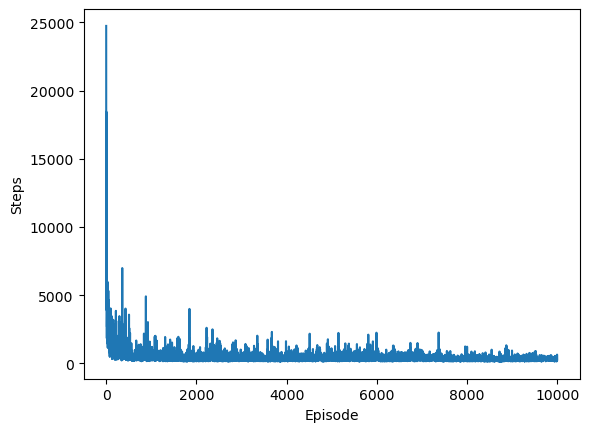

In [12]:
import matplotlib.pyplot as plt

# polt step by episode
plt.plot(steps)
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.show()


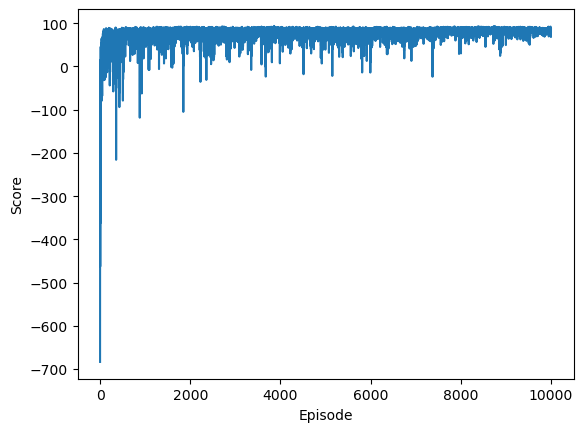

In [13]:
# plot score by episode
plt.plot(scores)
plt.xlabel("Episode")
plt.ylabel("Score")
plt.show()

In [18]:
# Testing the agent
n_episodes = 5
score = 0

env = gym.make("MountainCarContinuous-v0", render_mode="human")

for i in range(n_episodes):
    done = False
    truncated = False
    
    observation, info = env.reset()
    state = get_state(observation)
    state = (int(state[0]), int(state[1]))
    
    episode_score = 0
    episode_steps = 0
    
    while not done and not truncated:
        
        action_index = max_action_index(Q_table, state, action_space)
        action_value = action_space[action_index]
        
        observation_, reward, done, truncated, info = env.step([action_value])
        state_ = get_state(observation_)
        state = (int(state_[0]), int(state_[1]))
        
        state = state_
        
        episode_score += reward
        episode_steps += 1
        
    print("Episode: ", i)
    print("Score: ", episode_score)
    print("Steps: ", episode_steps)
    
    print("+++++++++++++++++++++++++++++++")
    
    score += episode_score

Episode:  0
Score:  92.25
Steps:  121
+++++++++++++++++++++++++++++++
Episode:  1
Score:  -24.97499999999965
Steps:  999
+++++++++++++++++++++++++++++++
Episode:  2
Score:  92.89999999999999
Steps:  144
+++++++++++++++++++++++++++++++
Episode:  3
Score:  92.025
Steps:  166
+++++++++++++++++++++++++++++++
Episode:  4
Score:  92.075
Steps:  163
+++++++++++++++++++++++++++++++
